In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

In [37]:
df_swing = pd.read_csv("datasets/st1/2008_swing_states.csv")
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [38]:
interested = df_swing[["state", "county", "dem_share"]]
interested.head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


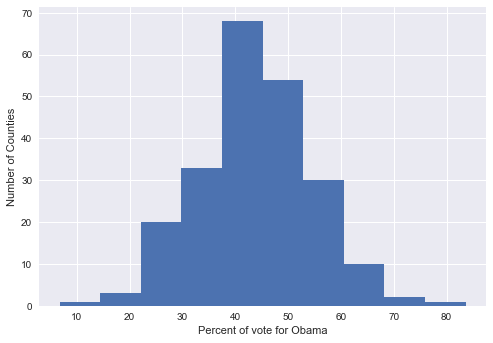

In [39]:
_ = plt.hist(df_swing["dem_share"])
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

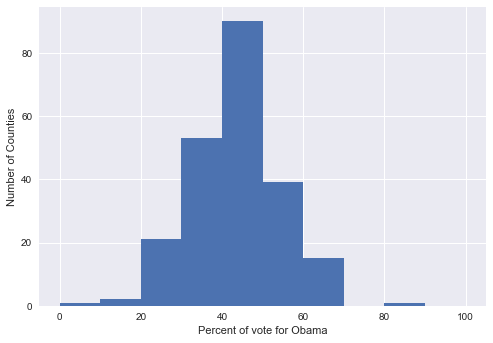

In [40]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100]

_ = plt.hist(df_swing["dem_share"], bins = bin_edges)
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

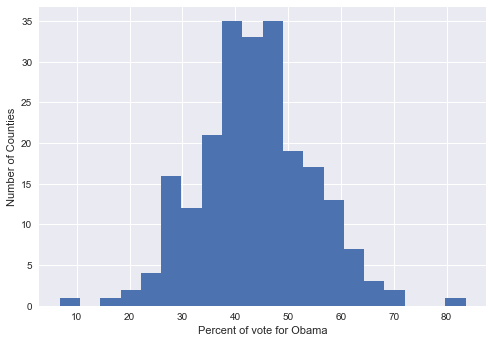

In [41]:
_ = plt.hist(df_swing["dem_share"], bins = 20)
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

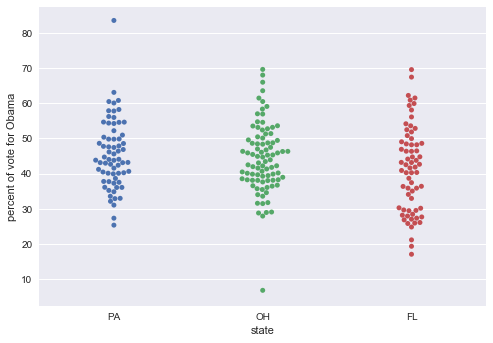

In [42]:
_ = sns.swarmplot(x = "state", y = "dem_share", data = df_swing)
_ = plt.xlabel("state")
_ = plt.ylabel("percent of vote for Obama")
plt.show()

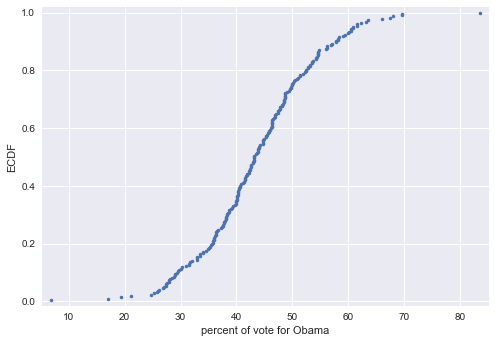

In [43]:
# Empirical cumulative distribution function (ECDF)
# 20% of counties had 36% or less vote for Obama
# 75% of counties had less than half vote for Obama

x = np.sort(df_swing["dem_share"])
y = np.arange(1, len(x) + 1) / len(x)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
_ = plt.xlabel("percent of vote for Obama")
_ = plt.ylabel("ECDF")
plt.margins(0.02) # keeps the data off plot edges
plt.show()

In [44]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

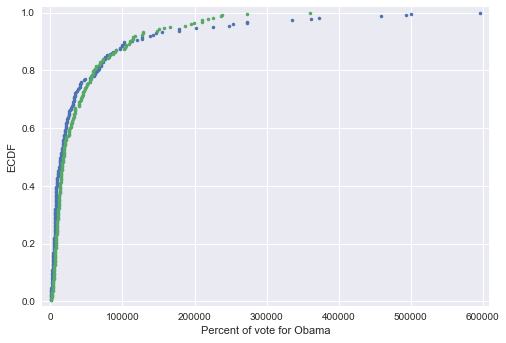

In [48]:
# dem_votes
# rep_votes

x1, y1 = ecdf(df_swing["dem_votes"])
x2, y2 = ecdf(df_swing["rep_votes"])

_ = plt.plot(x1, y1, marker = ".", linestyle = "none")
_ = plt.plot(x2, y2, marker = ".", linestyle = "none")

_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("ECDF")

plt.margins(0.02)
plt.show()